# Distribution de l'estimateur post-selection

Basé sur Leeb and Potscher (2006). Figures 4.1 et 4.2 du manuel.

Code original: 29 decembre 2017

Script jupyter: 24 octobre 2019

@author: jeremylhour

# 1. Définition des fonctions

In [2]:
Delta = function(a, b){
  pnorm(a+b)-pnorm(a-b)
}

dPS = function(x, beta=.5, rho=.7, n=100){
  # variance normalisee a 1
  c = sqrt(log(n))
  probaR = Delta(sqrt(n)*beta,c)
  y = probaR*dnorm(x,mean=-rho*sqrt(n)*beta,sd=sqrt(1-rho^2)) +
    (1-Delta((sqrt(n)*beta+rho*x)/sqrt(1-rho^2),c/sqrt(1-rho^2)))*dnorm(x)
  return(list(
      y=y,
      probaR=probaR
  ))
}

# 2. RHO = .7

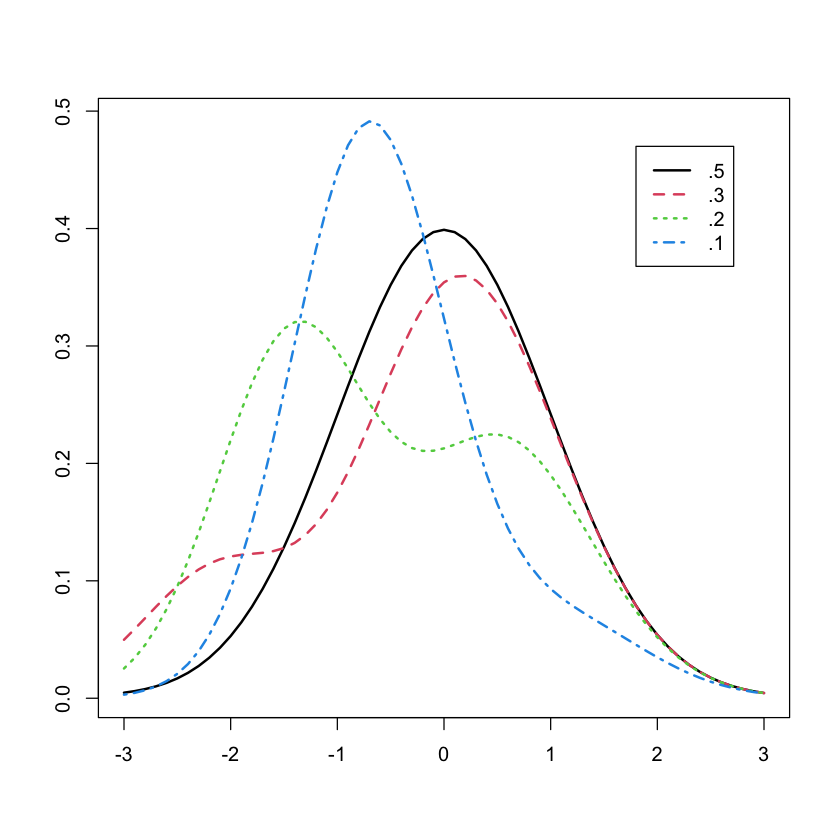

In [3]:
xset = seq(-3,3,by=.1)

Myset = cbind(dPS(xset,beta=.5)$y,
              dPS(xset,beta=.3)$y,
              dPS(xset,beta=.2)$y,
              dPS(xset,beta=.1)$y)

matplot(xset,Myset,type="l",
        xlab="",ylab="",lwd=c(2,2,2,2))
legend(1.8,.47, c(".5", ".3", ".2",".1"),
col=seq_len(4), lty=seq_len(4), lwd=c(2,2,2,2))

# 3. RHO = .9

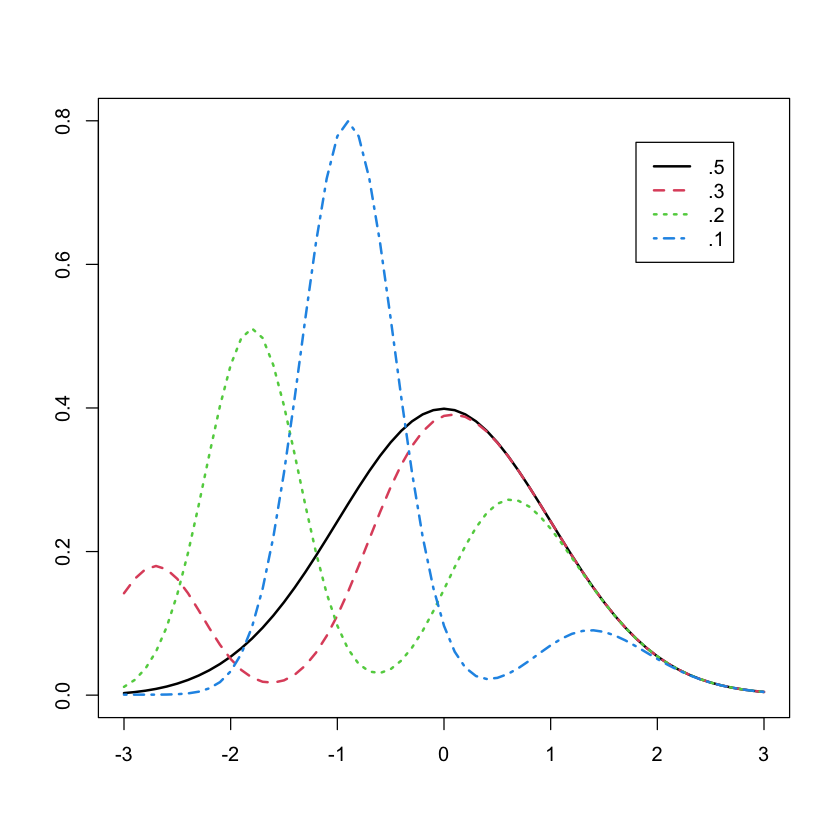

In [4]:
Myset = cbind(dPS(xset,beta=.5,rho=.9)$y,
              dPS(xset,beta=.3,rho=.9)$y,
              dPS(xset,beta=.2,rho=.9)$y,
              dPS(xset,beta=.1,rho=.9)$y)

matplot(xset,Myset,type="l",
        xlab="",ylab="",lwd=c(2,2,2,2))
legend(1.8,.77, c(".5", ".3", ".2",".1"),
       col=seq_len(4), lty=seq_len(4), lwd=c(2,2,2,2))

# 4. RHO = .4

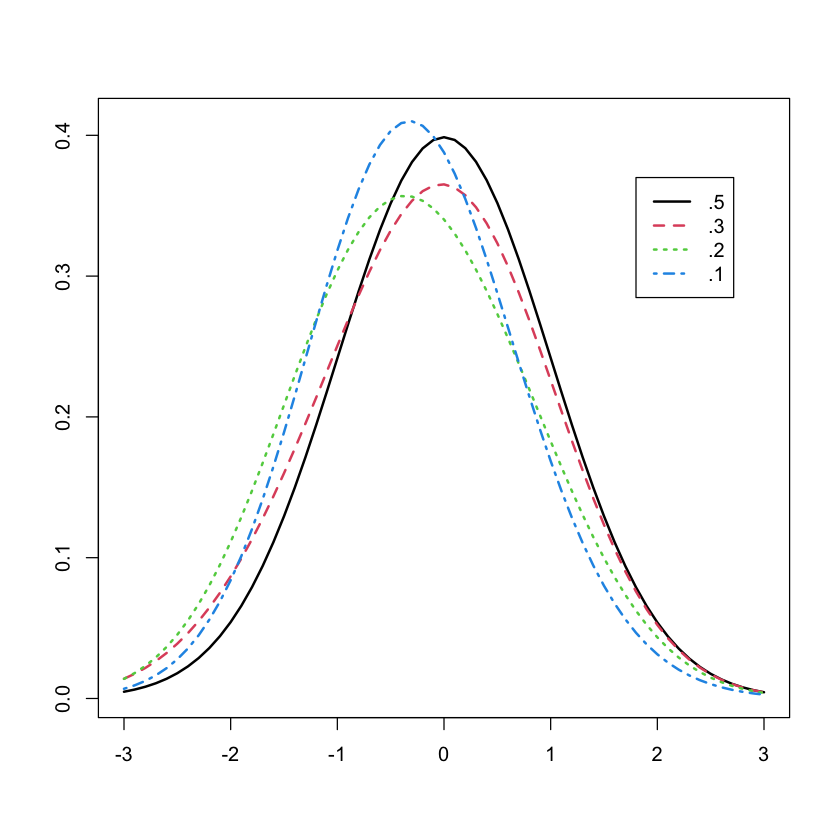

In [5]:
Myset = cbind(dPS(xset,beta=.5,rho=.4)$y,
              dPS(xset,beta=.3,rho=.4)$y,
              dPS(xset,beta=.2,rho=.4)$y,
              dPS(xset,beta=.1,rho=.4)$y)

matplot(xset,Myset,type="l",
        xlab="",ylab="",lwd=c(2,2,2,2))
legend(1.8,.37, c(".5", ".3", ".2",".1"),
       col=seq_len(4), lty=seq_len(4), lwd=c(2,2,2,2))